# **Part I: Clinical metadata analysis**

The task in Part I is to explore the patients' metadata. The clinical data provides information about each patient’s demographics (age and sex) and each patient’s cognitive scores (MMSE and CDR).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from math import sqrt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

#Import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
import matplotlib.style as style
import os



In [ ]:
# Set plotting style
%matplotlib inline
sns.set_theme()

In [ ]:
# Load the clinical data
from google.colab import drive
drive.mount('/content/drive')
OASIS_df = pd.read_csv('drive/MyDrive/OASIS_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


If the above command does not work, you can mount your Google Drive manually. Go to "Files" icon on the left of your notebook, and click on "Mount Drive" icon at the top to mount your Google Drive in the runtime's virtual machine. You need to upload the OASIS_data.csv file for Part 1 of the assignment. Scroll through your Google Drive in drop-down menu to the left of your notebook. In order to get the path to OASIS_data.csv, click on the three dots to the right of the file name and select "Copy path".

#### Question 1

In [ ]:
OASIS_df.head()

,sex,age,CDR,MMS,diagnosis
0,F,26,NaN,30.0,CN
1,M,35,NaN,30.0,CN
2,F,66,0.0,29.0,CN
3,M,78,1.0,23.0,AD
4,F,54,NaN,30.0,CN


In [ ]:
OASIS_df.info()
#CDR has 197 non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        377 non-null    object 
 1   age        377 non-null    int64  
 2   CDR        197 non-null    float64
 3   MMS        377 non-null    float64
 4   diagnosis  377 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 14.9+ KB


In [ ]:
OASIS_df.describe()

,age,CDR,MMS
count,377.000000,197.000000,377.000000
mean,50.456233,0.266497,28.363395
std,25.050137,0.399355,3.262951
min,18.000000,0.000000,14.000000
25%,23.000000,0.000000,29.000000
50%,50.000000,0.000000,30.000000
75%,73.000000,0.500000,30.000000
max,96.000000,2.000000,30.000000


In [ ]:
# Question 1.1
# Use the .isnull() Pandas method to identify which feature is affected by missing values
# Use the .fillna() Pandas method to impute the missing values appropriately

In [ ]:
OASIS_data = pd.read_csv('drive/MyDrive/OASIS_data.csv')
bool_series = pd.isnull(OASIS_data["CDR"])
df= OASIS_data[bool_series]
print(" BEFORE FILLNA")
print(OASIS_data[bool_series])
#Answer:
#subjects who have MMSE score with 30 which is 'no dimentia' and diagnosis:CN(cognitively normal) missed CDR value
#solution:
#filling 0 into the data: 180rows
newOASIS_data=df.fillna(0)
print(" AFTER FILLNA")
print(newOASIS_data)
#all data after filling 0: 377rows
new1OASIS_data=OASIS_data.fillna(0)
print(new1OASIS_data)


 BEFORE FILLNA
    sex  age  CDR   MMS diagnosis
0     F   26  NaN  30.0        CN
1     M   35  NaN  30.0        CN
4     F   54  NaN  30.0        CN
5     M   21  NaN  30.0        CN
8     M   22  NaN  30.0        CN
..   ..  ...  ...   ...       ...
369   F   22  NaN  30.0        CN
370   M   37  NaN  30.0        CN
372   F   24  NaN  30.0        CN
373   M   22  NaN  30.0        CN
375   F   21  NaN  30.0        CN

[180 rows x 5 columns]
 AFTER FILLNA
    sex  age  CDR   MMS diagnosis
0     F   26  0.0  30.0        CN
1     M   35  0.0  30.0        CN
4     F   54  0.0  30.0        CN
5     M   21  0.0  30.0        CN
8     M   22  0.0  30.0        CN
..   ..  ...  ...   ...       ...
369   F   22  0.0  30.0        CN
370   M   37  0.0  30.0        CN
372   F   24  0.0  30.0        CN
373   M   22  0.0  30.0        CN
375   F   21  0.0  30.0        CN

[180 rows x 5 columns]
    sex  age  CDR   MMS diagnosis
0     F   26  0.0  30.0        CN
1     M   35  0.0  30.0        CN
2    

In [ ]:
from IPython.utils.text import num_ini_spaces
# Question 1.2
# Use an approach similar to the one below to compare the number of diseased and healthy patients


In [ ]:
# Here we are comparing the number of female and male patients: there are many more females than males (imbalance)
num_female = len(OASIS_df[OASIS_df['sex'] == 'F'])
num_male = len(OASIS_df[OASIS_df['sex'] == 'M'])
print('Number of females: ' + str(num_female))
print('Number of males: ' + str(num_male))

num_CN = len(OASIS_df[OASIS_df['diagnosis'] == 'CN'])
num_AD = len(OASIS_df[OASIS_df['diagnosis'] == 'AD'])
print('Number of cognitively normal: ' + str(num_CN))
print('Number of Alzheimer disease: ' + str(num_AD))
#imbalance


#severe AD
severe = (new1OASIS_data['MMS'] >= 0) & (new1OASIS_data['MMS'] <= 10) & (new1OASIS_data['CDR'] >= 2)
sub_df = new1OASIS_data[severe]
count = len(sub_df)
print('severe AD:' + str(count))


#potential AD
potential = (new1OASIS_data['MMS'] >= 0) & (new1OASIS_data['MMS'] <= 20) & (new1OASIS_data['CDR'] >= 1)
sub_df = new1OASIS_data[potential]
count1 = len(sub_df)
print('potential AD:' + str(count1))



Number of females: 235
Number of males: 142
Number of cognitively normal: 304
Number of Alzheimer disease: 73
severe AD:0
potential AD:12


In [ ]:
# Question 1.3
# Use the histplot seaborn plotting function to study the distribution of the feature "age"

[Text(0, 0.5, 'Number of patients')]

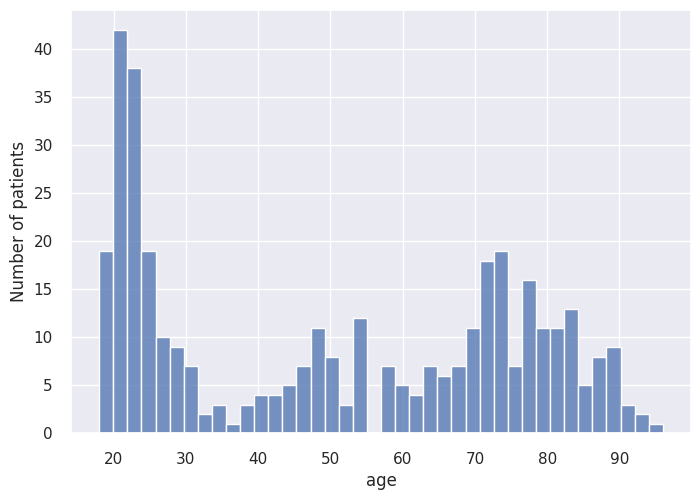

In [ ]:
def read_data():
    OASIS_data = pd.read_csv("OASIS_data.csv")
    return OASIS_data

pa=sns.histplot(OASIS_data, x="age", bins=40)
pa.set(ylabel="Number of patients")

#percentage of female patients= (235/377) *100= 62.33421
#median age of healty and diseased patients(Median age of CN and AD):
#for healthy patient which stands for CN, the median age is 38.5
#for diseased patient which stands for AD, the median age is 78

Median age of CN patients:  38.5


<Axes: xlabel='age', ylabel='Count'>

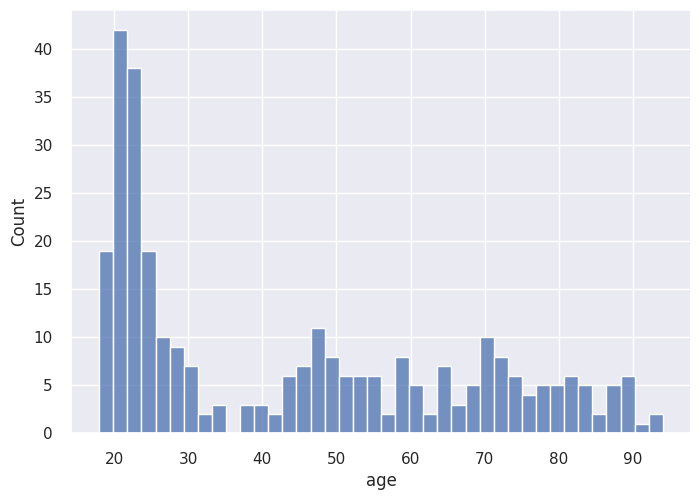

In [ ]:
diagnosis_data = OASIS_data[["age", "diagnosis"]]

# create a DataFrame with age and diagnosis columns
diagnosis_data = OASIS_data[['age', 'diagnosis']]

# select the rows where diagnosis is CN
cn_data = diagnosis_data[diagnosis_data['diagnosis'] == 'CN']

# calculate the median age of CN patients
median_age = cn_data['age'].median()

# print the median age
print("Median age of CN patients: ", median_age)
# plot a histogram of age distribution for CN patients
sns.histplot(cn_data, x='age', bins=40)

Median age of AD patients:  78.0


<Axes: xlabel='age', ylabel='Count'>

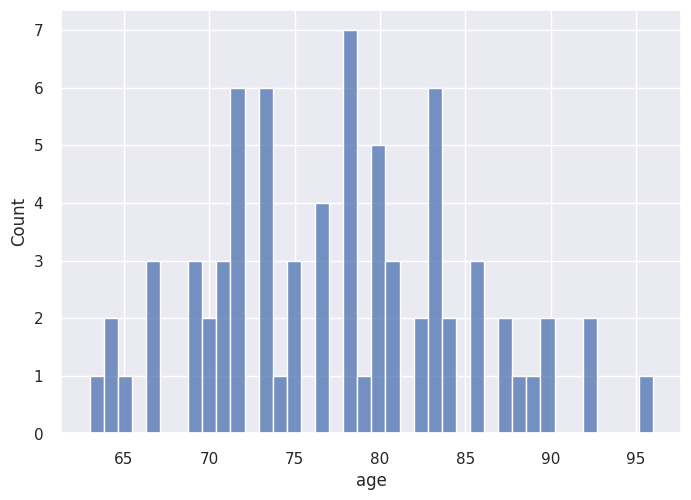

In [ ]:
diagnosis_data = OASIS_data[["age", "diagnosis"]]

# create a DataFrame with age and diagnosis columns
diagnosis_data = OASIS_data[['age', 'diagnosis']]

# select the rows where diagnosis is AD
ad_data = diagnosis_data[diagnosis_data['diagnosis'] == 'AD']

# calculate the median age of AD patients
median_age = ad_data['age'].median()

# print the median age
print("Median age of AD patients: ", median_age)
# plot a histogram of age distribution for AD patients
sns.histplot(ad_data, x='age', bins=40)

#### Question 2

In [ ]:
# Split data into predictive features and class labels (diagnosis)
X = OASIS_df.drop(columns=['diagnosis'], inplace=False)
y = OASIS_df['diagnosis']

In [ ]:
# Numeric encoding of categorical feature
# The "sex" information is no longer a string but an integer: 1 for male, 0 for female
encoder = LabelEncoder()
encoder.fit(['F','M'])
X['sex'] = encoder.transform(X['sex'])
X.head()

,sex,age,CDR,MMS
0,0,26,NaN,30.0
1,1,35,NaN,30.0
2,0,66,0.0,29.0
3,1,78,1.0,23.0
4,0,54,NaN,30.0


In [ ]:
# Visualize dataset
X.info()
df.info()
new1OASIS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     377 non-null    int64  
 1   age     377 non-null    int64  
 2   CDR     197 non-null    float64
 3   MMS     377 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 11.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 375
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        180 non-null    object 
 1   age        180 non-null    int64  
 2   CDR        0 non-null      float64
 3   MMS        180 non-null    float64
 4   diagnosis  180 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 8.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -

In [ ]:
# Clustering with k-means
# Use the KMeans function from Sklearn to cluster X. The result of the clustering, which is a mapping of each patient to
# one cluster, is referred to as the "labels" attribute in the Sklearn documentation. (excluding diagnosis info)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

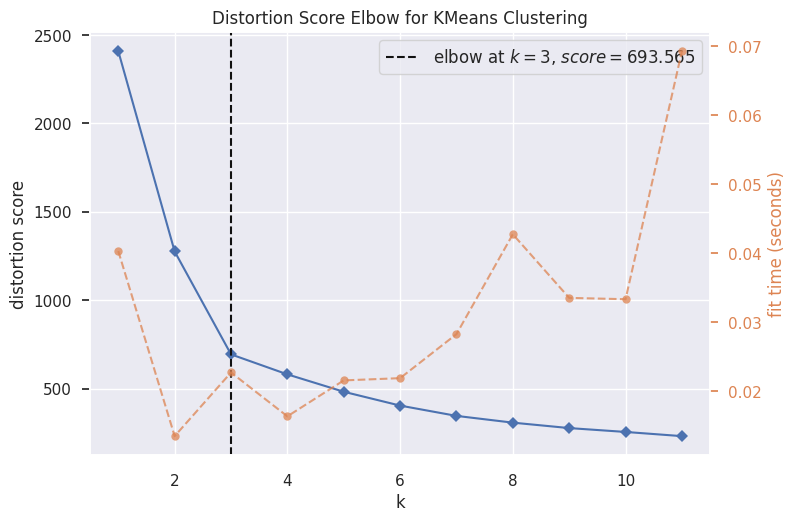

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.datasets import make_blobs
# Generate synthetic dataset with 5 random clusters
X_cl, y_cl = make_blobs(n_samples=378, n_features=2, centers=3, random_state=0)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(X_cl)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure


In [ ]:
new1OASIS_data_numeric = new1OASIS_data.select_dtypes(include=['float64', 'int64'])
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(new1OASIS_data_numeric)

In [ ]:
#Check sclaing features
df_scale = pd.DataFrame(df_scaled)
df_scale.head()

,0,1,2
0,0.102564,0.0,1.0000
1,0.217949,0.0,1.0000
2,0.615385,0.0,0.9375
3,0.769231,0.5,0.5625
4,0.461538,0.0,1.0000


In [ ]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
wcss=[]

for i in range(2,12):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(df_scale)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

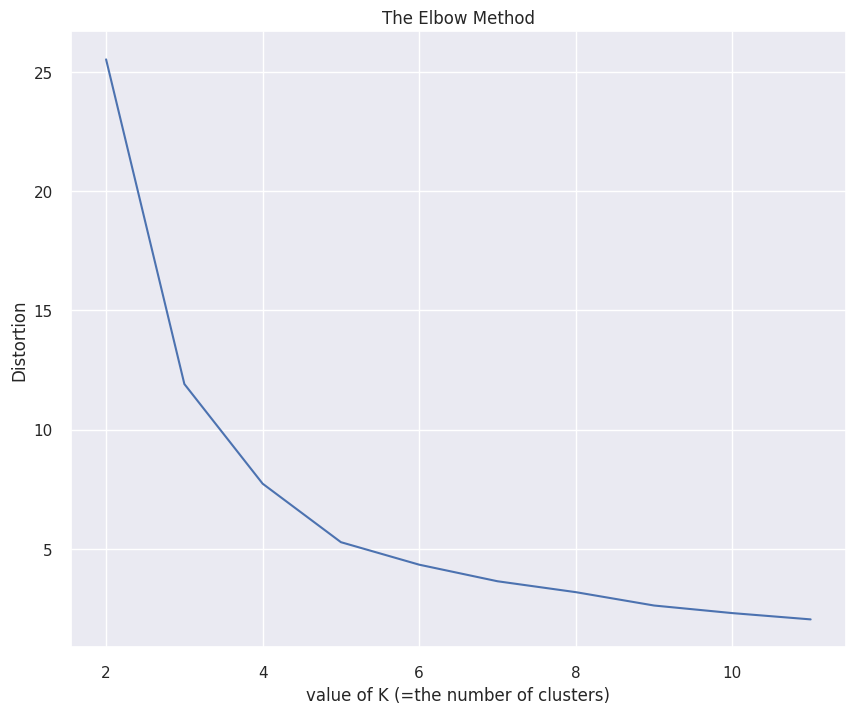

In [ ]:
#Visualizing the ELBOW method to get the optimal value of K
fig = plt.figure(figsize=(10,8))
plt.plot(range(2,12), wcss)
plt.title('The Elbow Method')
plt.xlabel('value of K (=the number of clusters)')
plt.ylabel('Distortion')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.5791022156122569
For n_clusters = 3 The average silhouette_score is : 0.6090796616775853


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.6166449690964215
For n_clusters = 5 The average silhouette_score is : 0.6324214188136672


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.6319184834321044


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.603224991934396


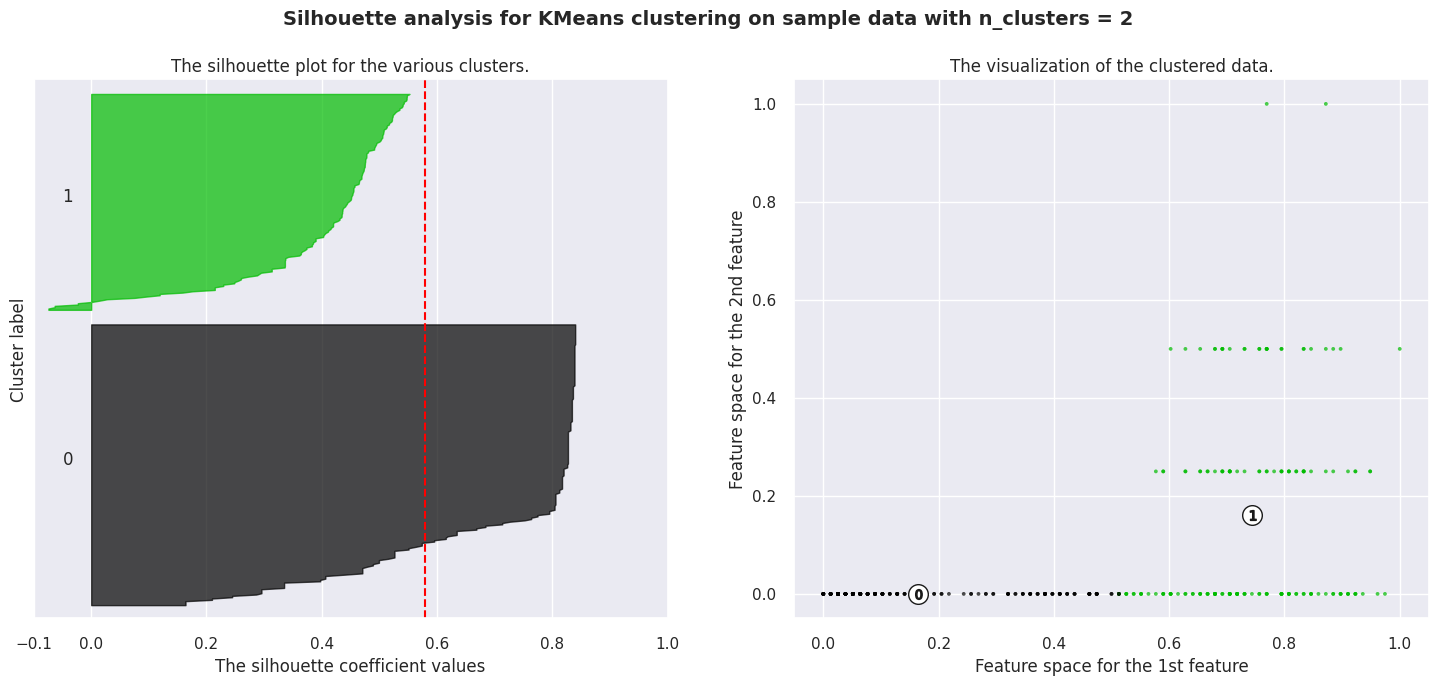

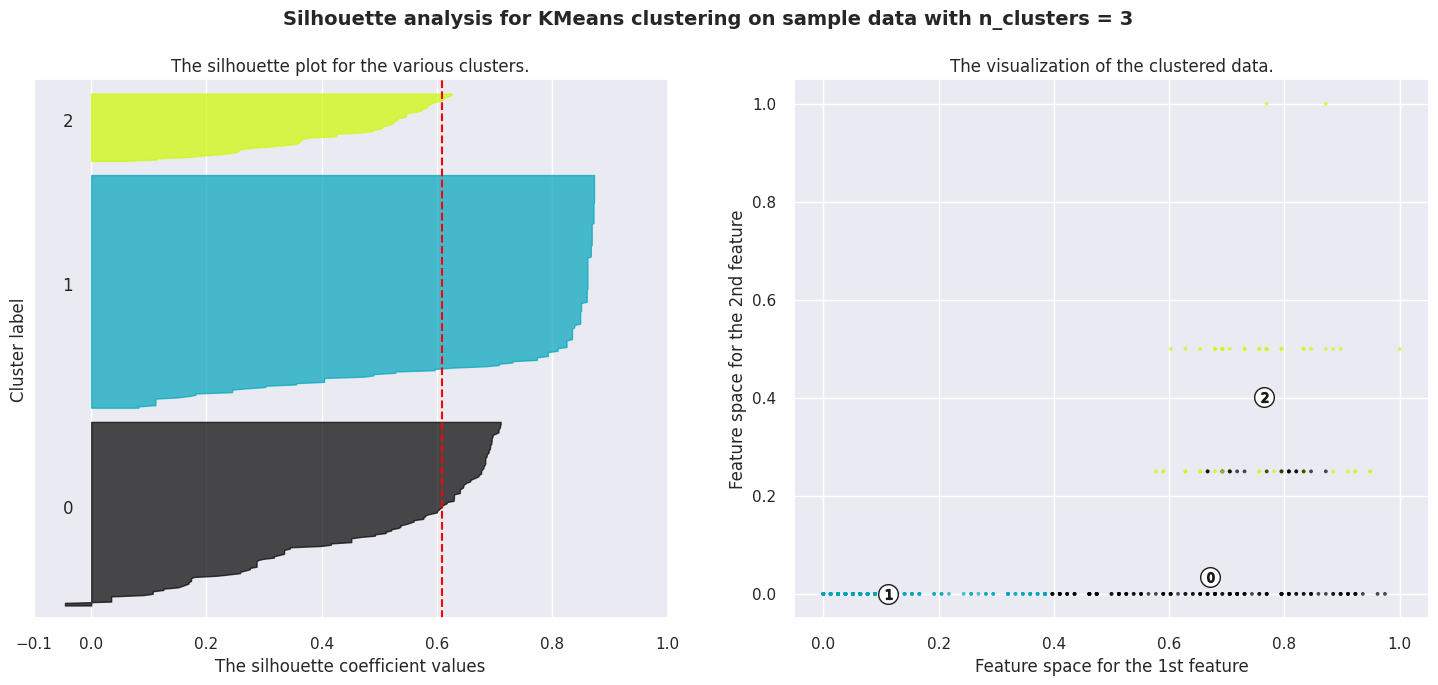

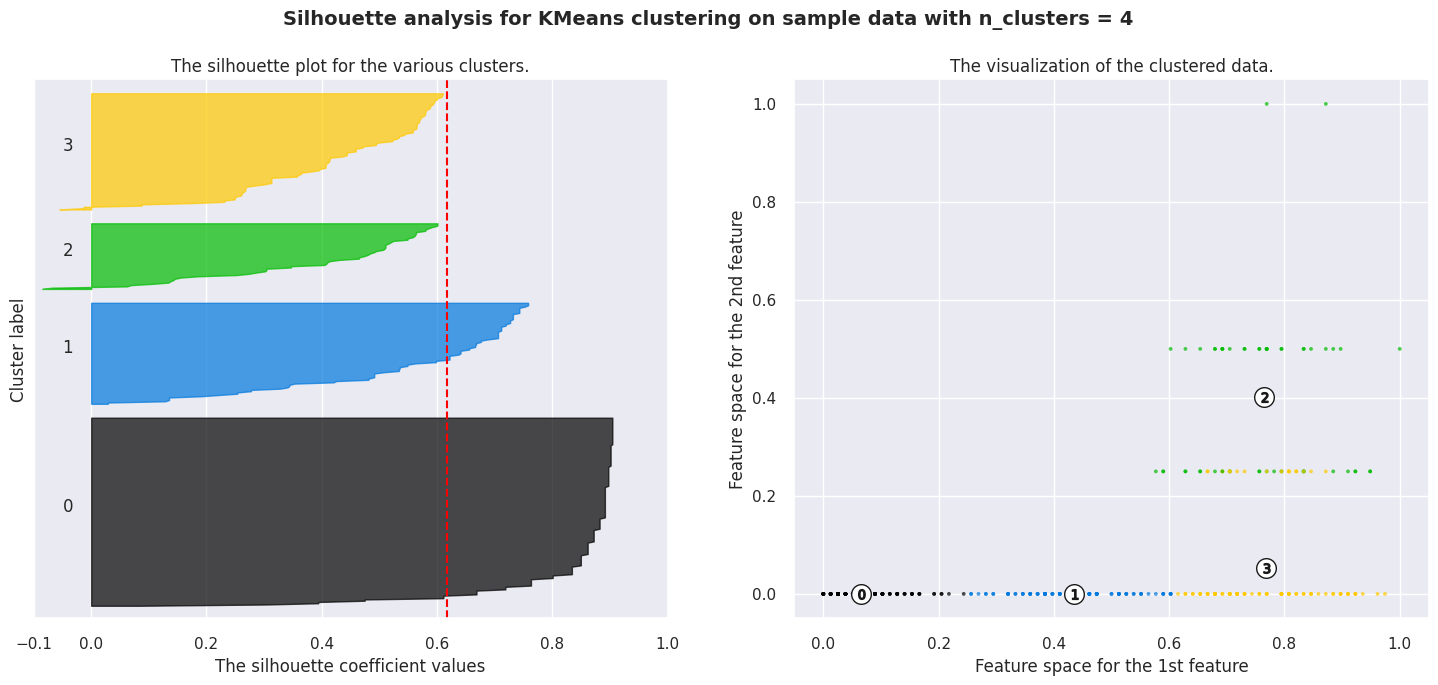

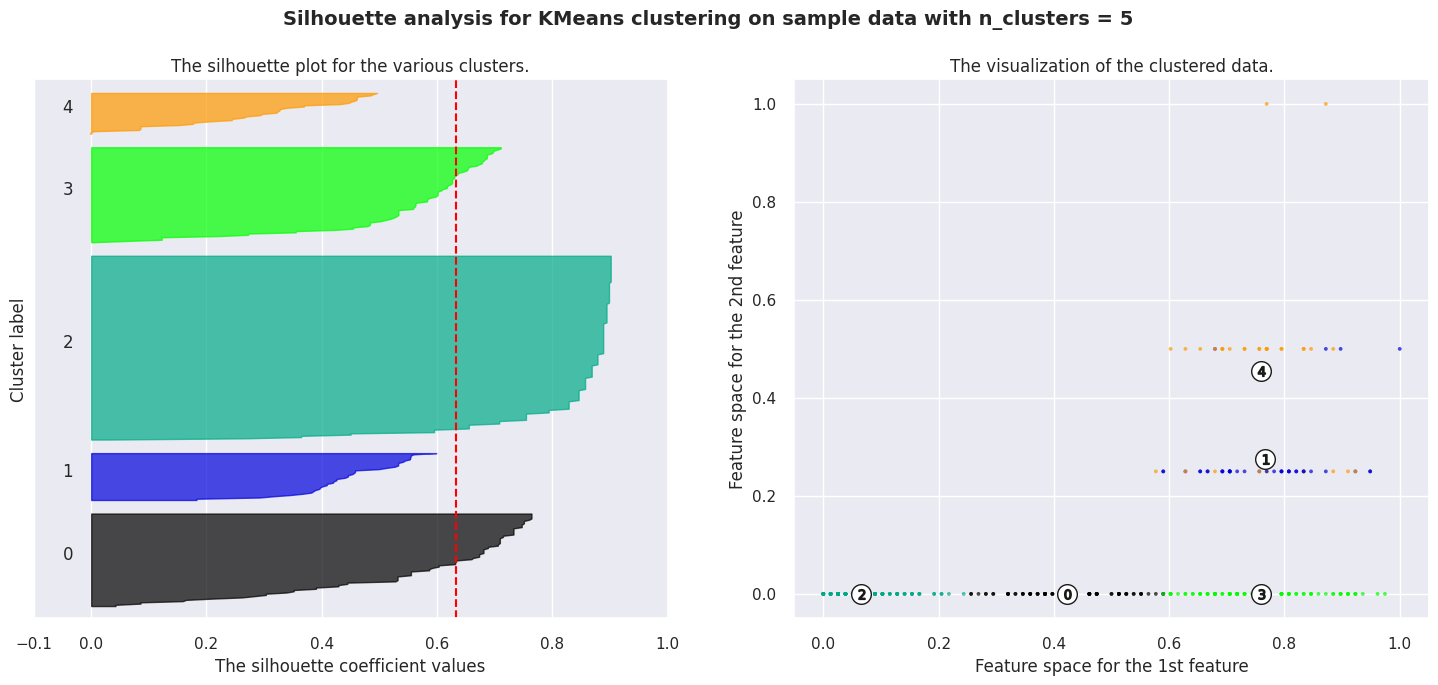

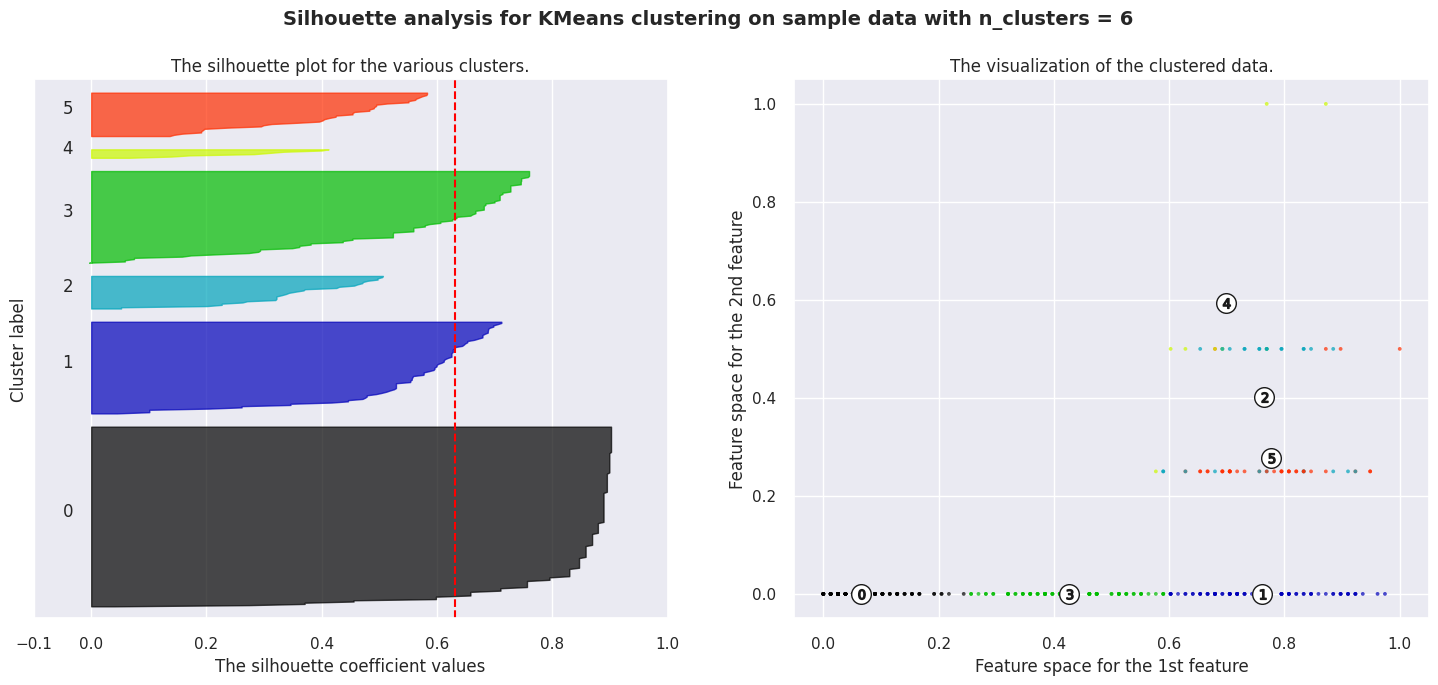

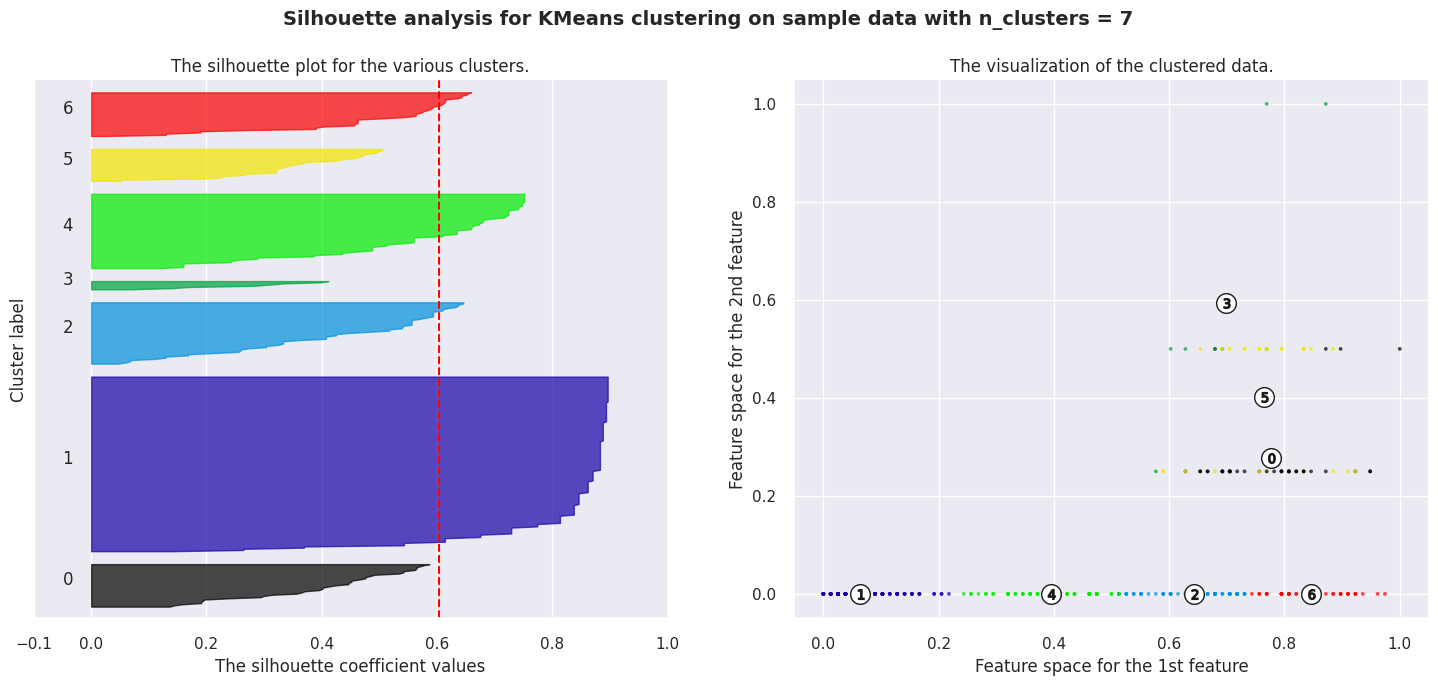

In [ ]:
range_n_clusters = [i for i in range(2,8)]
Xc =df_scaled
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(Xc) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(Xc)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Xc, cluster_labels)
    print(
         "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Xc, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
                        alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        Xc[:, 0], Xc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [ ]:
# Use a scatterplot plotting function from Seaborn (or any other type of figure) to study the output of the clustering
# and answer the questions.
X.head()

,sex,age,CDR,MMS
0,0,26,NaN,30.0
1,1,35,NaN,30.0
2,0,66,0.0,29.0
3,1,78,1.0,23.0
4,0,54,NaN,30.0


<ipython-input-23-067e89f40e61>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=X['age'], y=X['MMS'], s=150,


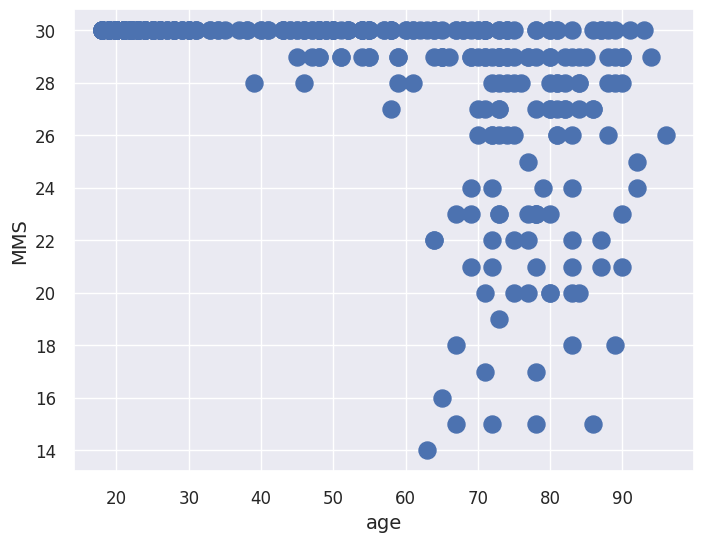

,age,MMS
286,20,30.0
258,84,28.0
262,68,30.0
145,48,29.0
55,50,30.0


In [ ]:

customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta", "lightseagreen", "darkorange"])

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=X['age'], y=X['MMS'], s=150,
            cmap = customcmap)
ax.set_xlabel(r'age', fontsize=14)
ax.set_ylabel(r'MMS', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

def initiate_centroids(k, dset):
    '''
    Select k data points as centroids
    k: number of centroids
    dset: pandas dataframe
    '''
    centroids = dset.sample(k)
    return centroids

np.random.seed(42)
k=5
df = X[['age','MMS']]
centroids = initiate_centroids(k, df)
centroids


In [ ]:
def rsserr(a,b):
    '''
    Calculate the root of sum of squared errors.
    a and b are numpy arrays
    '''
    return np.square(np.sum((a-b)**2))

for i, centroid in enumerate(range(centroids.shape[0])):
    err = rsserr(centroids.iloc[centroid,:], df.iloc[36,:])
    print('Error for centroid {0}: {1:.2f}'.format(i, err))

Error for centroid 0: 1296.00
Error for centroid 1: 11343424.00
Error for centroid 2: 3111696.00
Error for centroid 3: 235225.00
Error for centroid 4: 331776.00


<ipython-input-25-3fb3eeec49d9>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['centroid'], df['error'] = centroid_assignation(df, centroids)


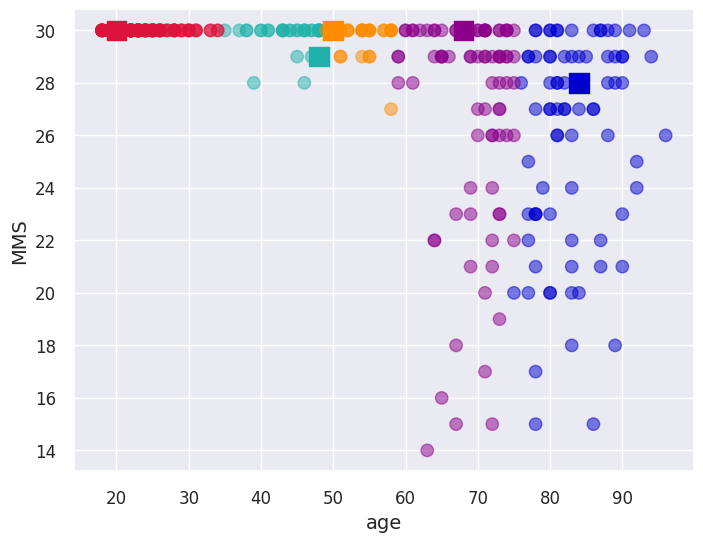

The total error is 1183706.00


In [ ]:
#Assign centroids
def centroid_assignation(dset, centroids):
    '''
    Given a dataframe `dset` and a set of `centroids`, we assign each
    data point in `dset` to a centroid.
    - dset - pandas dataframe with observations
    - centroids - pa das dataframe with centroids
    '''
    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []

    for obs in range(n):
        # Estimate error
        all_errors = np.array([])
        for centroid in range(k):
            err = rsserr(centroids.iloc[centroid, :], dset.iloc[obs,:])
            all_errors = np.append(all_errors, err)

        # Get the nearest centroid and the error
        nearest_centroid =  np.where(all_errors==np.amin(all_errors))[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errors)

        # Add values to corresponding lists
        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)

    return assignation, assign_errors
df['centroid'], df['error'] = centroid_assignation(df, centroids)
df.head()

#Plot(figure below)
ig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o',
            c=df['centroid'].astype('category'),
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],
            marker = 's', s=200, c=[0, 1, 2, 3, 4],
            cmap = customcmap)
ax.set_xlabel(r'age', fontsize=14)
ax.set_ylabel(r'MMS', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
print("The total error is {0:.2f}".format(df['error'].sum()))


In [ ]:
df.head()

,age,MMS,centroid,error
0,26,30.0,0,1296.0
1,35,30.0,3,28900.0
2,66,29.0,2,25.0
3,78,23.0,1,3721.0
4,54,30.0,4,256.0


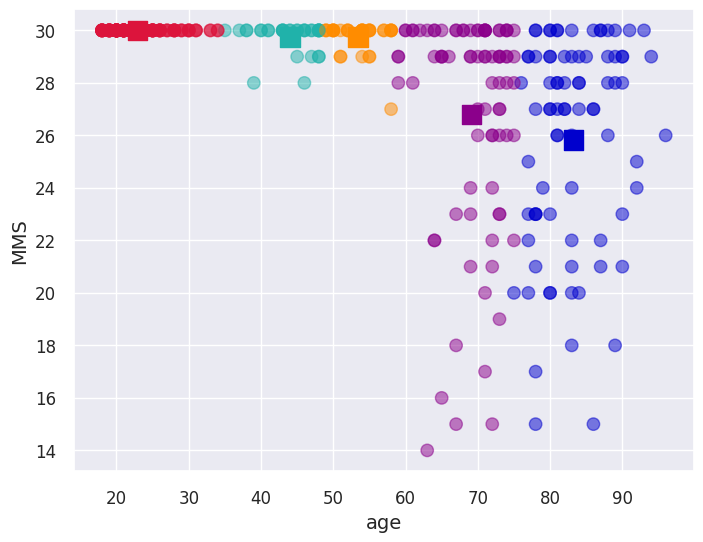

In [ ]:
#updating centroids
centroids = df.groupby('centroid').agg('mean').reset_index(drop = True)
centroids
#Verify that the position has been updated.
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o',
            c=df['centroid'].astype('category'),
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],
            marker = 's', s=200,
            c=[0, 1, 2, 3, 4], cmap = customcmap)
ax.set_xlabel(r'age', fontsize=14)
ax.set_ylabel(r'MMS', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
def kmeans(dset, k=5, tol=1e-4):
    '''
    K-means implementationd for a
    `dset`:  DataFrame with observations
    `k`: number of clusters, default k=2
    `tol`: tolerance=1E-4
    '''
    # Let us work in a copy, so we don't mess the original
    working_dset = dset.copy()
    # We define some variables to hold the error, the
    # stopping signal and a counter for the iterations
    err = []
    goahead = True
    j = 0

    # Step 2: Initiate clusters by defining centroids
    centroids = initiate_centroids(k, dset)
    while(goahead):
        # Step 3 and 4 - Assign centroids and calculate error
        working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids)
        err.append(sum(j_err))

        # Step 5 - Update centroid position
        centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)

        # Step 6 - Restart the iteration
        if j>0:
            # Is the error less than a tolerance (1E-4)
            if err[j-1]-err[j]<=tol:
                goahead = False
        j+=1

    working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids)
    centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)
    return working_dset['centroid'], j_err, centroids


In [ ]:
np.random.seed(42)
df['centroid'], df['error'], centroids =  kmeans(df[['age','MMS']], 5)
df.head() #cleaned dataset and run the algorithm


,age,MMS,centroid,error
0,26,30.0,0,109.233682
1,35,30.0,3,6266.410855
2,66,29.0,2,792.808537
3,78,23.0,1,1553.840926
4,54,30.0,4,6.375625


In [ ]:
centroids #location of final centroids

,age,MMS
0,22.767123,30.000000
1,83.710526,25.802632
2,70.727273,26.415584
3,43.894737,29.789474
4,55.550000,29.650000


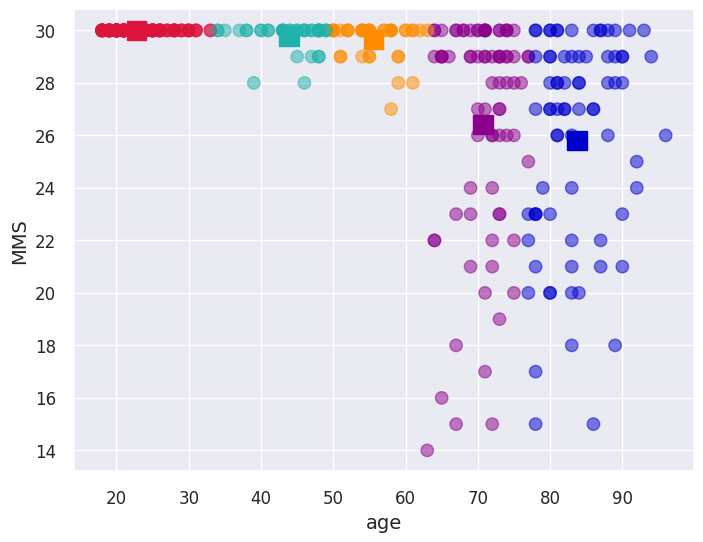

The total error is 486156.01


In [ ]:
#plot: we can see the relocated centroids.
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o',
            c=df['centroid'].astype('category'),
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],
            marker = 's', s=200, c=[0, 1, 2, 3, 4],
            cmap = customcmap)
ax.set_xlabel(r'age', fontsize=14)
ax.set_ylabel(r'MMS', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
print("The total error is {0:.2f}".format(df['error'].sum()))


**When K=3**

<ipython-input-32-e90c15f55e13>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=X['age'], y=X['MMS'], s=150,


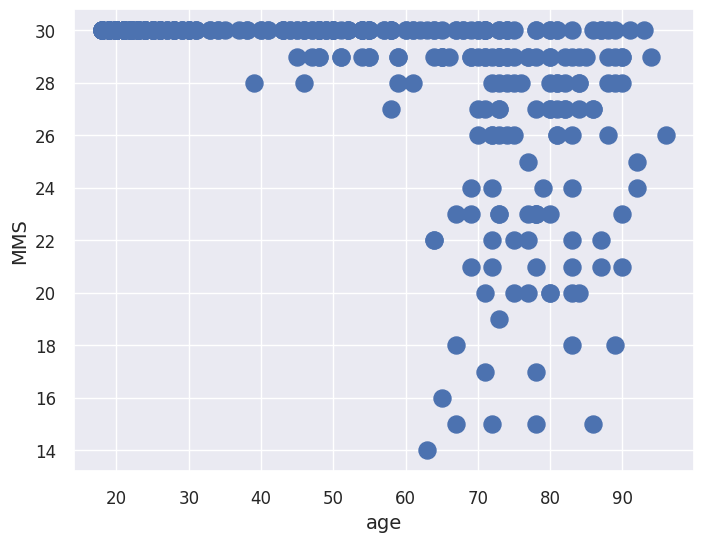

,age,MMS
286,20,30.0
258,84,28.0
262,68,30.0


In [ ]:
customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta"])

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=X['age'], y=X['MMS'], s=150,
            cmap = customcmap)
ax.set_xlabel(r'age', fontsize=14)
ax.set_ylabel(r'MMS', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

def initiate_centroids(k, dset):
    '''
    Select k data points as centroids
    k: number of centroids
    dset: pandas dataframe
    '''
    centroids = dset.sample(k)
    return centroids

np.random.seed(42)
k=3
df = X[['age','MMS']]
centroids = initiate_centroids(k, df)
centroids

In [ ]:
def rsserr(a,b):
    '''
    Calculate the root of sum of squared errors.
    a and b are numpy arrays
    '''
    return np.square(np.sum((a-b)**2))

for i, centroid in enumerate(range(centroids.shape[0])):
    err = rsserr(centroids.iloc[centroid,:], df.iloc[36,:])
    print('Error for centroid {0}: {1:.2f}'.format(i, err))

Error for centroid 0: 1296.00
Error for centroid 1: 11343424.00
Error for centroid 2: 3111696.00


<ipython-input-34-891850b3a9a1>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['centroid'], df['error'] = centroid_assignation(df, centroids)


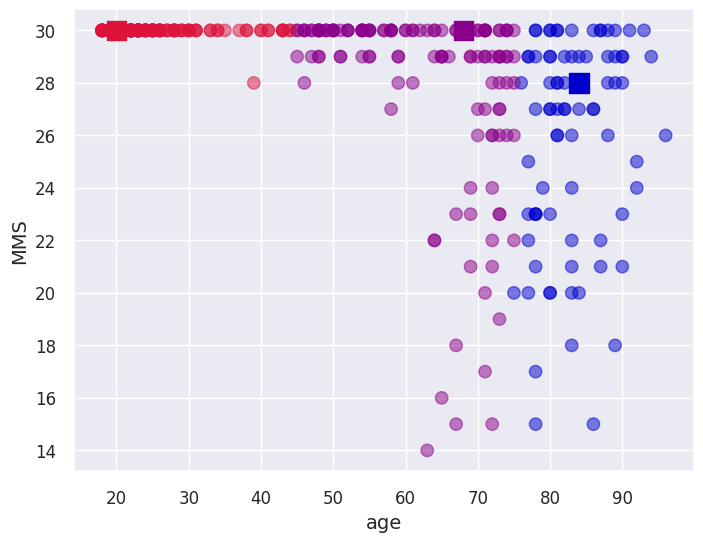

The total error is 9528563.00


In [ ]:
#Assign centroids
def centroid_assignation(dset, centroids):
    '''
    Given a dataframe `dset` and a set of `centroids`, we assign each
    data point in `dset` to a centroid.
    - dset - pandas dataframe with observations
    - centroids - pa das dataframe with centroids
    '''
    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []

    for obs in range(n):
        # Estimate error
        all_errors = np.array([])
        for centroid in range(k):
            err = rsserr(centroids.iloc[centroid, :], dset.iloc[obs,:])
            all_errors = np.append(all_errors, err)

        # Get the nearest centroid and the error
        nearest_centroid =  np.where(all_errors==np.amin(all_errors))[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errors)

        # Add values to corresponding lists
        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)

    return assignation, assign_errors
df['centroid'], df['error'] = centroid_assignation(df, centroids)
df.head()

#Plot(figure below)
ig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o',
            c=df['centroid'].astype('category'),
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],
            marker = 's', s=200, c=[0, 1, 2],
            cmap = customcmap)
ax.set_xlabel(r'age', fontsize=14)
ax.set_ylabel(r'MMS', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
print("The total error is {0:.2f}".format(df['error'].sum()))


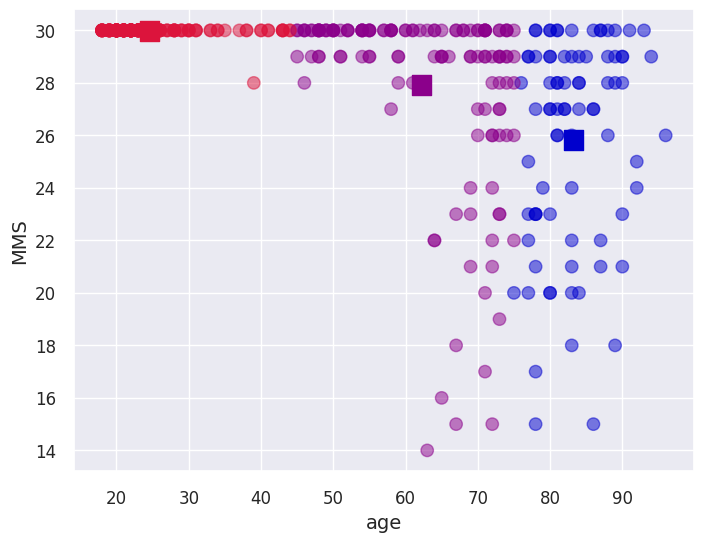

In [ ]:
#updating centroids
centroids = df.groupby('centroid').agg('mean').reset_index(drop = True)
centroids
#Verify that the position has been updated.
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o',
            c=df['centroid'].astype('category'),
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],
            marker = 's', s=200,
            c=[0, 1, 2], cmap = customcmap)
ax.set_xlabel(r'age', fontsize=14)
ax.set_ylabel(r'MMS', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
def kmeans(dset, k=3, tol=1e-4):
    '''
    K-means implementationd for a
    `dset`:  DataFrame with observations
    `k`: number of clusters, default k=2
    `tol`: tolerance=1E-4
    '''
    # Let us work in a copy, so we don't mess the original
    working_dset = dset.copy()
    # We define some variables to hold the error, the
    # stopping signal and a counter for the iterations
    err = []
    goahead = True
    j = 0

    # Step 2: Initiate clusters by defining centroids
    centroids = initiate_centroids(k, dset)
    while(goahead):
        # Step 3 and 4 - Assign centroids and calculate error
        working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids)
        err.append(sum(j_err))

        # Step 5 - Update centroid position
        centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)

        # Step 6 - Restart the iteration
        if j>0:
            # Is the error less than a tolerance (1E-4)
            if err[j-1]-err[j]<=tol:
                goahead = False
        j+=1

    working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids)
    centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)
    return working_dset['centroid'], j_err, centroids


In [ ]:
np.random.seed(42)
df['centroid'], df['error'], centroids =  kmeans(df[['age','MMS']], 3)
df.head() #cleaned dataset and run the algorithm


,age,MMS,centroid,error
0,26,30.0,0,53.977717
1,35,30.0,0,18806.399499
2,66,29.0,1,23813.082474
3,78,23.0,1,91.386644
4,54,30.0,2,5.441437


In [ ]:
centroids #location of final centroids

,age,MMS
0,23.093333,30.000000
1,78.076923,26.090909
2,52.297619,29.309524


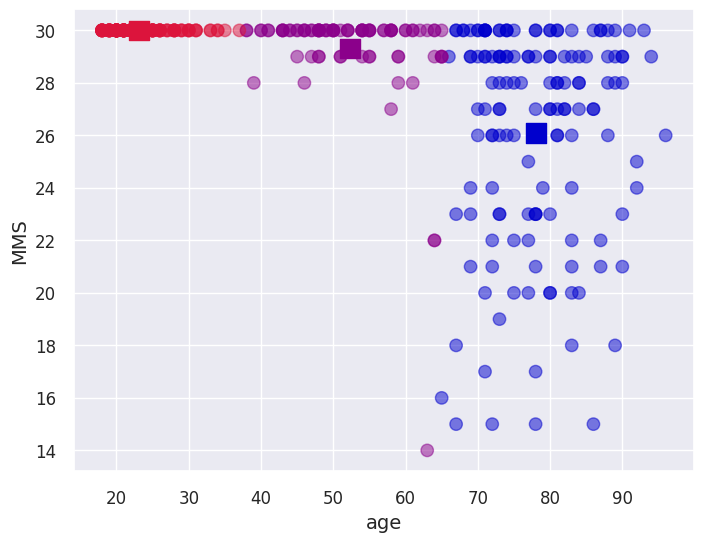

The total error is 2025717.74


In [ ]:
#plot: we can see the relocated centroids.
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o',
            c=df['centroid'].astype('category'),
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],
            marker = 's', s=200, c=[0, 1, 2],
            cmap = customcmap)
ax.set_xlabel(r'age', fontsize=14)
ax.set_ylabel(r'MMS', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
print("The total error is {0:.2f}".format(df['error'].sum()))


#### Question 3

In [ ]:
# Label encoding of the classification target:
# Alzheimer's disease(AD) is labeled 1 and cognitively normal(CN) is labeled 0.
# Alzheimer's disease (AD) is called the positive class because it is the class of interest.
# Split data into predictive features and class labels (diagnosis)
X = OASIS_df.drop(columns=['diagnosis'], inplace=False)
y = OASIS_df['diagnosis']

encoder = LabelEncoder()
encoder.fit(['F','M'])
X['sex'] = encoder.transform(X['sex'])

# X shouldn't contain NaN, So, I applied 'fillna(0)'
X=X.fillna(0)
X.head()

encoder = LabelEncoder()
encoder.fit(['CN','AD'])
encoder.classes_
y = encoder.transform(y)
y[y==0] = 2
y[y==1] = 0 #CN
y[y==2] = 1 #AD

In [ ]:
# Split X and y into a training set (75%) and a testing set (25%)

print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


     sex  age  CDR   MMS
0      0   26  0.0  30.0
1      1   35  0.0  30.0
2      0   66  0.0  29.0
3      1   78  1.0  23.0
4      0   54  0.0  30.0
..   ...  ...  ...   ...
372    0   24  0.0  30.0
373    1   22  0.0  30.0
374    0   72  0.0  28.0
375    0   21  0.0  30.0
376    1   51  0.0  29.0

[377 rows x 4 columns]


In [ ]:
# Scale features (data matrix columns) to have a mean of zero and a standard deviation of one
# Scaling is necessary when features are measured in different units and have different ranges
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Instantiate a logistic regression model with L2 regularization
logreg_model = LogisticRegression(penalty='l2', random_state=0)

In [ ]:
# Fit the logistic regression model using the labeled training data
# X shouldn't contain NaN, So, I applied 'fillna'
logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

For question3.1:

how a logistic regression model is obtained from labelled data:

how it performs classification of new unlabelled data:

the formula of how the probability of one patient having Alzheimer’s disease is a linear model of the log odds.:

Accuracy on testing set: 100.0%
[[80  0]
 [ 0 15]]


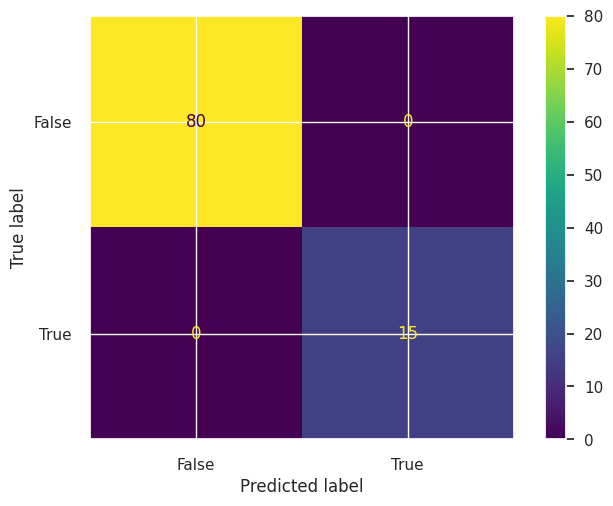

In [ ]:
# Evaluate the model's predictive performance using the testing data
y_pred = logreg_model.predict(X_test)
print('Accuracy on testing set: ' + str(100*len(y_test == y_pred)/len(y_test)) + '%')

# Confusion matrix on the testing set
confusion_matrix = metrics.confusion_matrix(y_test, y_pred) #(실제값, 예측값)
true_negatives, false_positives, false_negatives, true_positives = confusion_matrix.ravel()
print(confusion_matrix)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
#[true negative,  false positive ]
#[flase negative, true positive  ]

For answer the question3.3:

The result of data leakage is a model that appears to perform very well during training and validation, but performs poorly on new, unseen data. This is because the model has essentially "memorized" information from the training set that it shouldn't have access to, leading to overfitting.

To avoid data leakage, it is important to carefully partition data into separate sets for training, validation, and testing. It is also important to properly preprocess the data to ensure that the model is not inadvertently trained on information it should not have access to. Cross-validation can also be used to validate the model's performance on different subsets of the data.

data leakage

- when splitting a data set into testing and training sets
- Ideally, there is no intersection between these two sets
- to simulate the real-world data which is unseen to that model.

high levels of performance
- because that model is being run on data that it had already seen in some capacity in the training set
- When such a model is then used on truly unseen data that is coming mostly on the production side, then the performance of that model will be much lower than expected after deployment.

how happens
- data used in the training process contains information about what the model is trying to predict.
- some of your data present in the test set is also copied in the train set and vice-versa.



In [ ]:
# Inspect the logisitc regression model coefficients
coef_sex = np.round(logreg_model.coef_[0][0], 3)
coef_age = np.round(logreg_model.coef_[0][1], 3)
coef_CDR = np.round(logreg_model.coef_[0][2], 3)
coef_MMS = np.round(logreg_model.coef_[0][3], 3)
print('Coefficient of sex: ' + str(coef_sex))
print('Coefficient of age: ' + str(coef_age))
print('Coefficient of CDR: ' + str(coef_CDR))
print('Coefficient of MMS: ' + str(coef_MMS))

Coefficient of sex: 0.121
Coefficient of age: 0.825
Coefficient of CDR: 2.924
Coefficient of MMS: -1.646


For answer the question3.2:

The coefficients represent the log-odds of the outcome variable given each predictor variable, while holding all other variables constant.

Odds are the ratio of the probability of success to failure: Log of odds=log(p/1−p). It is used when we want a non binary result.

at p > 0.5 -> we get value of log(odds) in range (0, ∞).

at p < 0.5 -> we get value of log(odds) in range (-∞, 0).


The coefficient of sex (0.121) suggests that being male (coded as 1) is associated with a slightly higher log-odds of the outcome variable compared to being female (coded as 0), while holding age, CDR, and MMS constant.

The coefficient of age (0.825) suggests that for each unit increase in age, the log-odds of the outcome variable increase by 0.825, while holding sex, CDR, and MMS constant.

The coefficient of CDR (2.924) suggests that for each unit increase in CDR, the log-odds of the outcome variable increase by 2.924, while holding sex, age, and MMS constant. CDR is a measure of severity of cognitive impairment, so this coefficient suggests that more severe impairment is strongly associated with the outcome variable.

The coefficient of MMS (-1.646) suggests that for each unit increase in MMS (a measure of cognitive function), the log-odds of the outcome variable decrease by 1.646, while holding sex, age, and CDR constant. This coefficient suggests that better cognitive function is associated with a lower likelihood of the outcome variable.